This notebook is a guide to Hyperparameter Tuning.
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.
A hyperparameter is a parameter whose value is used to control the learning process.
Please upvote if you like this kernel.


In [127]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import itertools
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/diabetes.csv


In [128]:
diabetes = pd.read_csv("/kaggle/input/diabetes.csv")
print(diabetes.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [129]:
diabetes.shape

(768, 9)

In [130]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [131]:
display(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

In [132]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [133]:
print (diabetes.isnull().values.any())

False


In [134]:
 0 in diabetes.values


True

Count 0 values in diabetes dataset

In [135]:
print("# rows in dataframe {0}".format(len(diabetes)))
print("Zero in Pregnancies : {0}".format(len(diabetes.loc[diabetes['Pregnancies'] == 0])))
print("Zero in Glucose : {0}".format(len(diabetes.loc[diabetes['Glucose'] == 0])))
print("Zero in BloodPressure: {0}".format(len(diabetes.loc[diabetes['BloodPressure'] == 0])))
print("Zero in SkinThickness : {0}".format(len(diabetes.loc[diabetes['SkinThickness'] == 0])))
print("Zero in Insulin  : {0}".format(len(diabetes.loc[diabetes['Insulin'] == 0])))
print("Zero in BMI : {0}".format(len(diabetes.loc[diabetes['BMI'] == 0])))
print("Zero in DiabetesPedigreeFunction  : {0}".format(len(diabetes.loc[diabetes['DiabetesPedigreeFunction'] == 0])))
print("Zero in Age: {0}".format(len(diabetes.loc[diabetes['Age'] == 0])))

# rows in dataframe 768
Zero in Pregnancies : 111
Zero in Glucose : 5
Zero in BloodPressure: 35
Zero in SkinThickness : 227
Zero in Insulin  : 374
Zero in BMI : 11
Zero in DiabetesPedigreeFunction  : 0
Zero in Age: 0


In [136]:
#Replace 0 to NaN

R_d=diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
R_d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.000,72.000,35.000,nan,33.600
1,85.000,66.000,29.000,nan,26.600
2,183.000,64.000,nan,nan,23.300
3,89.000,66.000,23.000,94.000,28.100
4,137.000,40.000,35.000,168.000,43.100


In [137]:
R_d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Handling the Missing values by replacing NaN to mean


In [138]:
pd.options.display.float_format ='{:,.2f}'.format

diabetes['Glucose'].fillna(diabetes['Glucose'].mean(),inplace=True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(),inplace=True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].mean(),inplace=True)
diabetes['Insulin'].fillna(diabetes['Insulin'].mean(),inplace=True)
diabetes['BMI'].fillna(diabetes['BMI'].mean(),inplace=True)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,155.55,33.60,0.63,50,1
1,1,85.00,66.00,29.00,155.55,26.60,0.35,31,0
2,8,183.00,64.00,29.15,155.55,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1


# Data Visualization

Analysing the Outcome to  get the number of diabetic & Healthy person


In [139]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Outcome 0 means Non diabetic, outcome 1 means diabetic
 so the Data is biased towards people who are non-diabetics

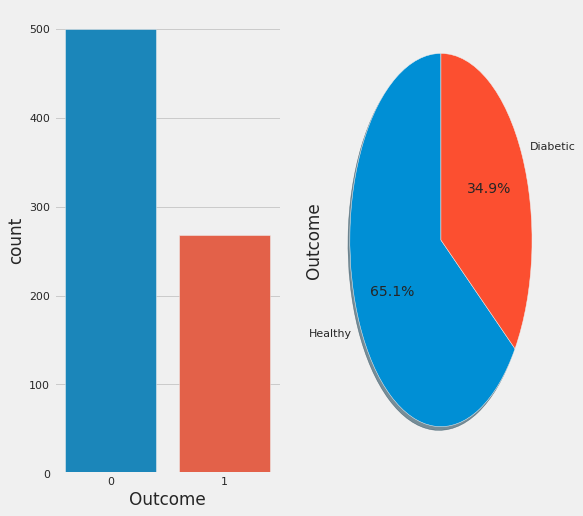

In [140]:
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

sns.countplot(diabetes['Outcome'],ax=ax1[0])

labels = 'Healthy', 'Diabetic'

diabetes.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

count plot shows the count values of the outcome.
pieplot shows that 65.1% people are Healthy and 34.9% people are diabetic

Dist Plot helps us to flexibly plot a univariate distribution of observations.


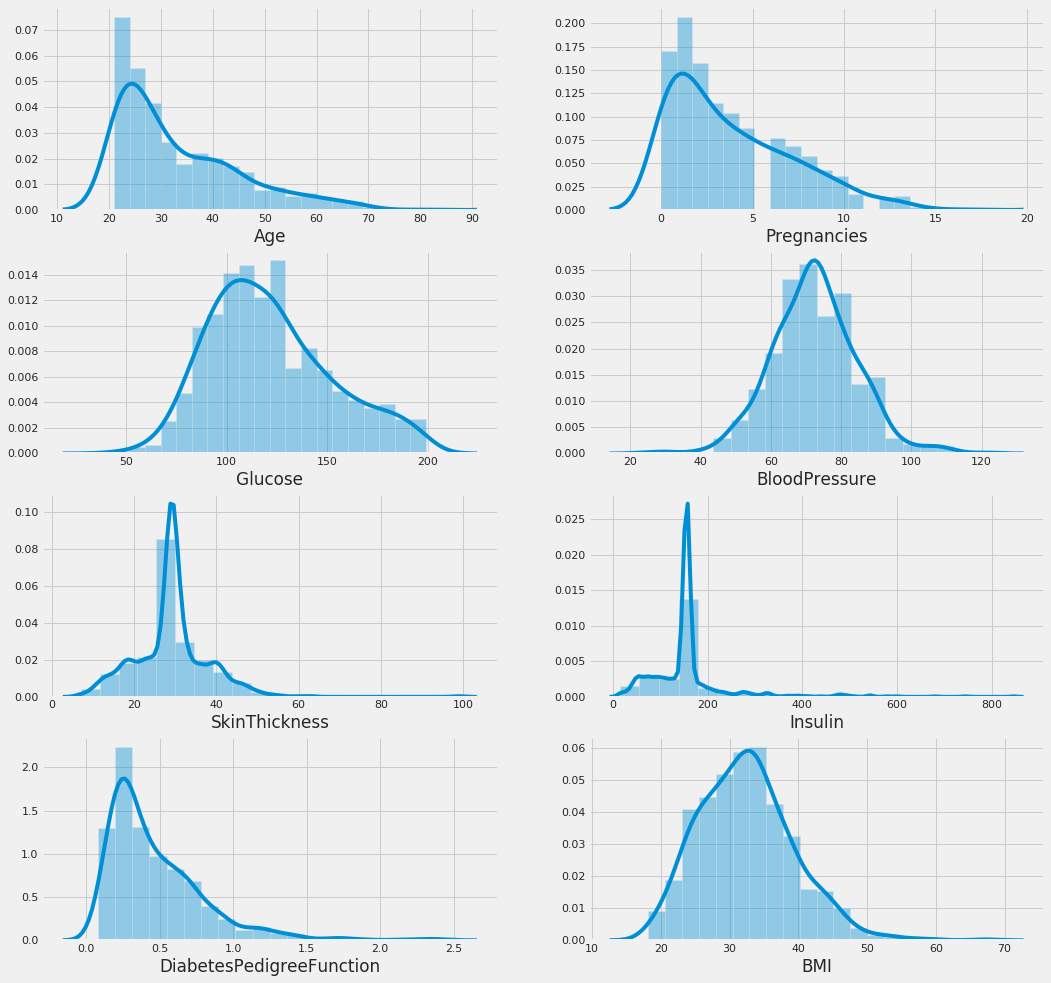

In [141]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(diabetes.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(diabetes.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(diabetes.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(diabetes.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetes.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetes.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(diabetes.BMI, bins = 20, ax=ax[3,1]) 

## Pair Plots

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

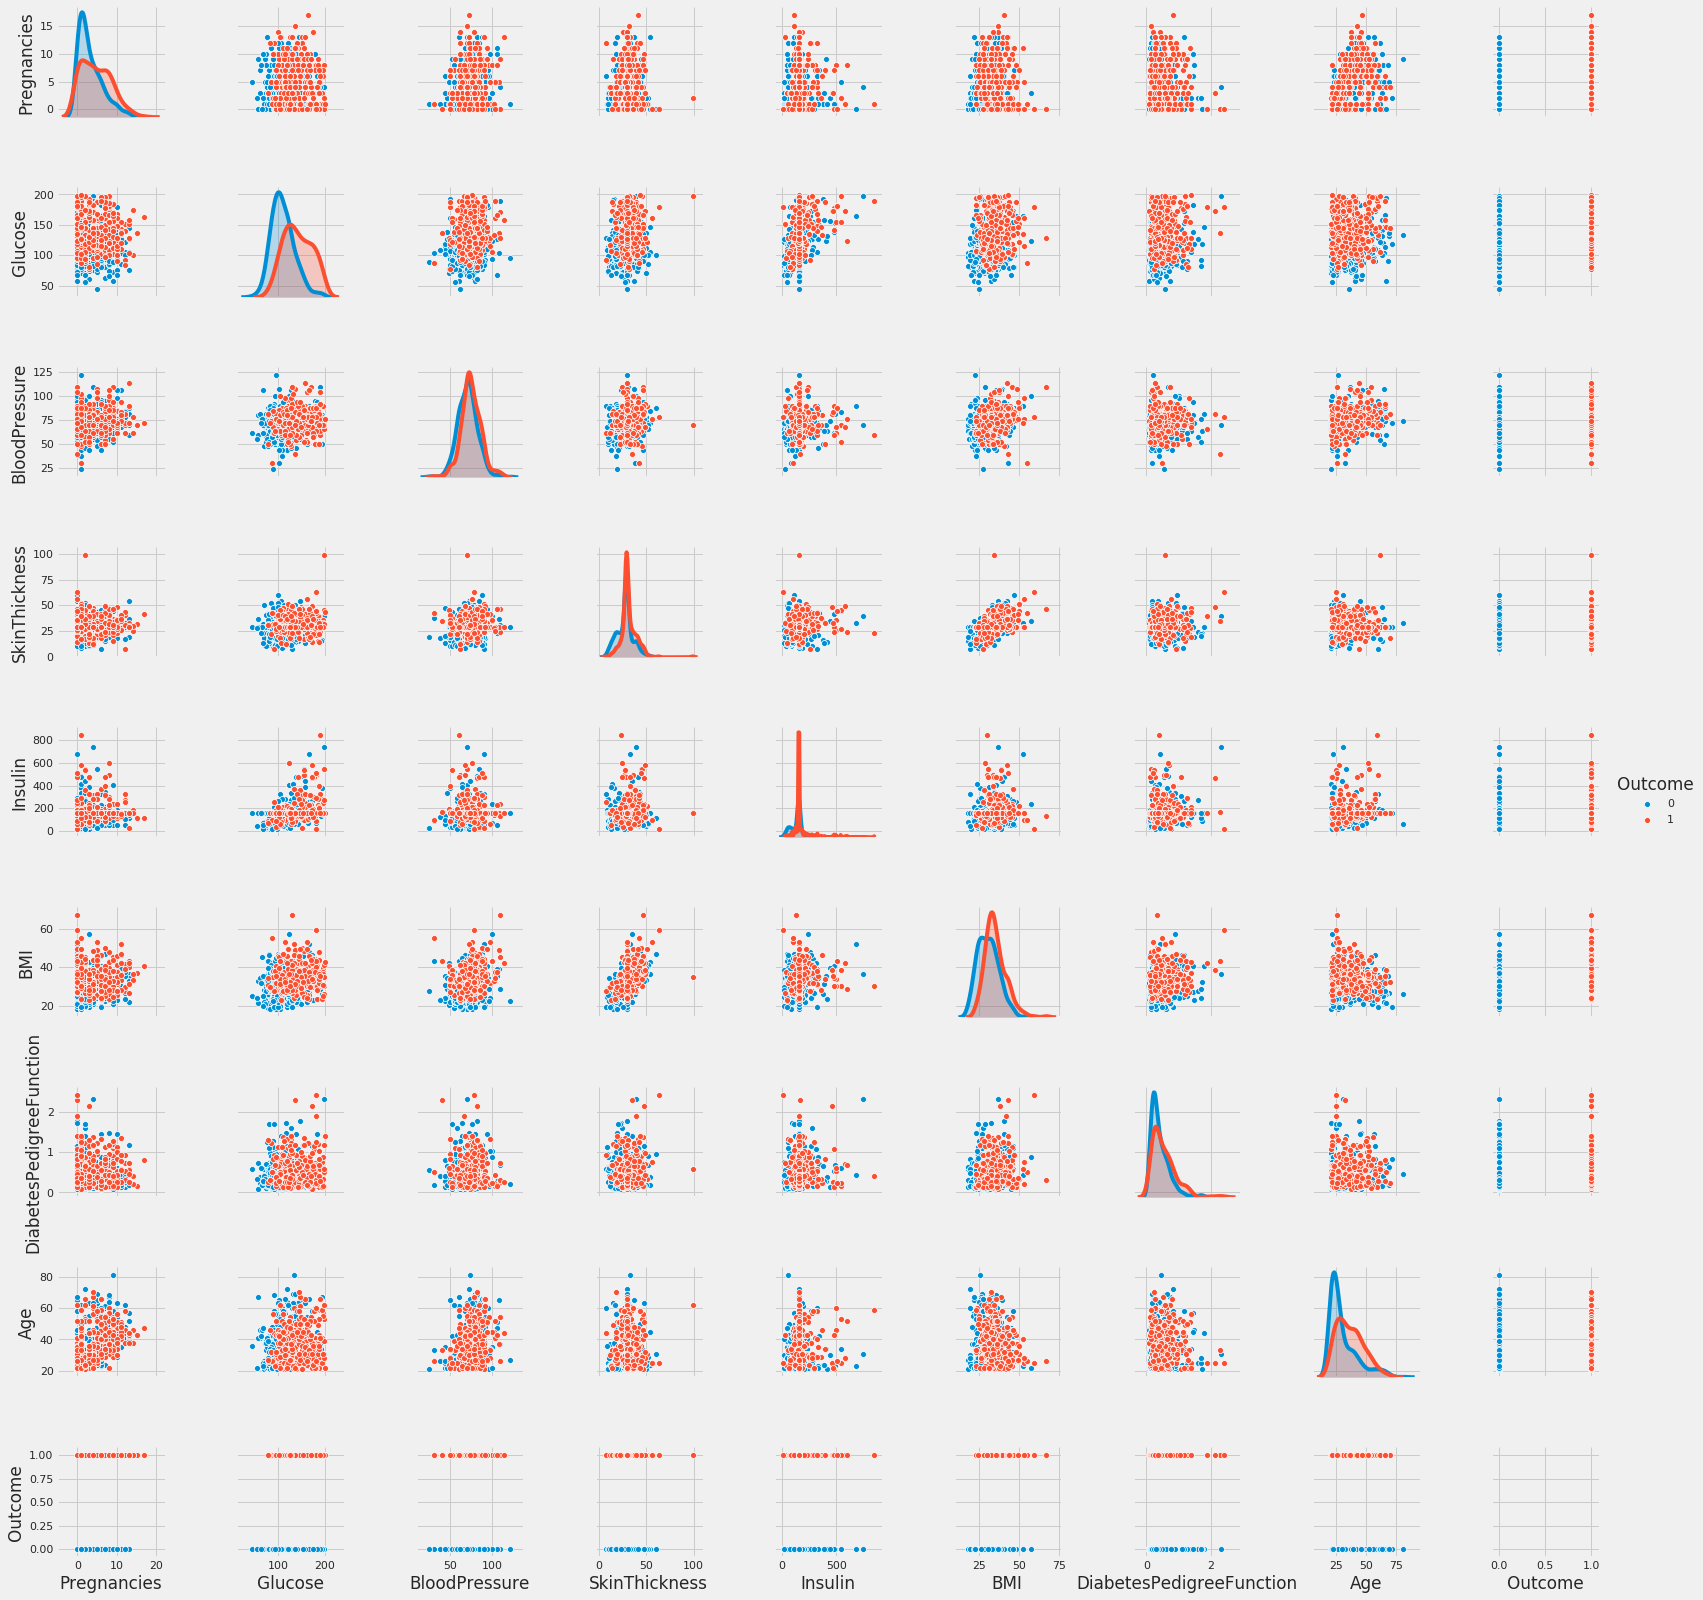

In [142]:
sns.pairplot(diabetes,hue='Outcome', diag_kind='kde')


# # Correlation between features

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation. 

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

In [143]:
pd.options.display.float_format ='{:,.3f}'.format

correlation=diabetes.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.128,0.209,0.083,0.056,0.022,-0.034,0.544,0.222
Glucose,0.128,1.000,0.218,0.193,0.420,0.231,0.137,0.267,0.493
BloodPressure,0.209,0.218,1.000,0.193,0.073,0.281,-0.003,0.325,0.166
SkinThickness,0.083,0.193,0.193,1.000,0.158,0.542,0.101,0.128,0.215
Insulin,0.056,0.420,0.073,0.158,1.000,0.167,0.099,0.137,0.214
BMI,0.022,0.231,0.281,0.542,0.167,1.000,0.153,0.026,0.312
DiabetesPedigreeFunction,-0.034,0.137,-0.003,0.101,0.099,0.153,1.000,0.034,0.174
Age,0.544,0.267,0.325,0.128,0.137,0.026,0.034,1.000,0.238
Outcome,0.222,0.493,0.166,0.215,0.214,0.312,0.174,0.238,1.000


correlation plot---heatmap


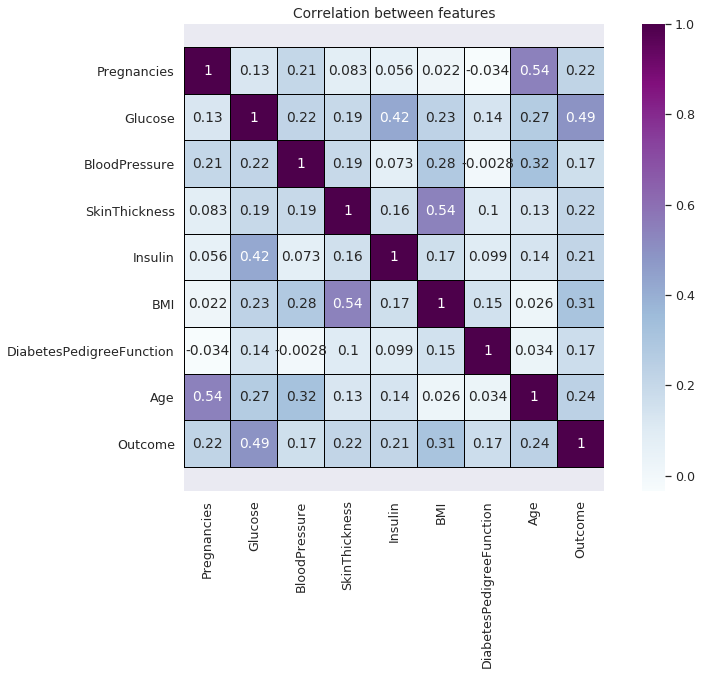

In [144]:
sns.set(font_scale=1.15)
plt.figure(figsize=(12, 8))

ax =sns.heatmap(correlation, linewidths=0.01,
            annot=True,square=True,cmap='BuPu',linecolor="black")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation between features');

plt.show()

Observations:
The correlation plot shows the relation between the parameters.

Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome. Insulin and DiabetesPedigreeFunction have little correlation with the outcome. BloodPressure and SkinThickness have tiny correlation with the outcome. There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose

# Feature selection

In [145]:
Feature = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [146]:
X= Feature
X[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.000,72.000,35.000,155.548,33.600,0.627,50
1,1,85.000,66.000,29.000,155.548,26.600,0.351,31
2,8,183.000,64.000,29.153,155.548,23.300,0.672,32
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33


In [147]:
y = diabetes['Outcome'].values
y[0:5]

array([1, 0, 1, 0, 1])

# Normalize Data 

In [148]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 6.39947260e-01,  8.65108070e-01, -3.35182392e-02,
         6.65502121e-01, -3.34507888e-16,  1.66291742e-01,
         4.68491977e-01,  1.42599540e+00],
       [-8.44885053e-01, -1.20616153e+00, -5.29859033e-01,
        -1.74633816e-02, -3.34507888e-16, -8.52531177e-01,
        -3.65060778e-01, -1.90671905e-01],
       [ 1.23388019e+00,  2.01581340e+00, -6.95305964e-01,
         8.08793628e-16, -3.34507888e-16, -1.33283341e+00,
         6.04397318e-01, -1.05584152e-01],
       [-8.44885053e-01, -1.07465235e+00, -5.29859033e-01,
        -7.00428884e-01, -7.24388738e-01, -6.34211980e-01,
        -9.20762614e-01, -1.04154944e+00],
       [-1.14185152e+00,  5.03457822e-01, -2.68066914e+00,
         6.65502121e-01,  1.46550563e-01,  1.54897999e+00,
         5.48490910e+00, -2.04963989e-02]])

Train Test Split

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 8) (537,)
Test set: (231, 8) (231,)


check the desired 70% train, 30% test split of the data

In [150]:
trainval = (1.0 * len(X_train)) / (1.0 * len(diabetes.index))
testval = (1.0 * len(X_test)) / (1.0 * len(diabetes.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

69.92% in training set
30.08% in test set


# Predictive Modeling with Hyperparammeter Tuning 

# Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
diabetesTree = DecisionTreeClassifier()
diabetesTree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf='deprecated', min_samples_split=2,
            min_weight_fraction_leaf='deprecated', presort=False,
            random_state=None, splitter='best')

In [152]:
diabetesTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf='deprecated', min_samples_split=2,
            min_weight_fraction_leaf='deprecated', presort=False,
            random_state=None, splitter='best')

In [153]:
y_predict = diabetesTree.predict(X_test)

In [154]:
from sklearn import metrics
print("DecisionTrees's Accuracy on Train set: ", metrics.accuracy_score(y_train, diabetesTree.predict(X_train)))
print("DecisionTrees's Accuracy on Test set : ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy on Train set:  1.0
DecisionTrees's Accuracy on Test set :  0.696969696969697


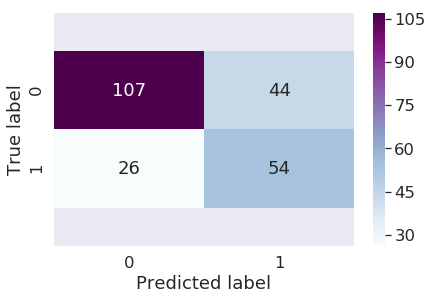

In [155]:
from sklearn.metrics import classification_report, confusion_matrix

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

In [156]:
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       151
           1       0.55      0.68      0.61        80

   micro avg       0.70      0.70      0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.70       231



In [157]:
from sklearn.model_selection import GridSearchCV


In [158]:
parameters = {'max_depth': (2,4,6,8,10),
             'criterion': ('gini','entropy'),
             'min_samples_leaf' : (1,2,3,4,5),
             'max_leaf_nodes' : (3,4,5,6,7,8,9,10)
        
             }

In [159]:
gridsearch_tree = GridSearchCV(estimator = diabetesTree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                        n_jobs = -1
                          )

In [160]:
gridsearch_tree.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf='deprecated', min_samples_split=2,
            min_weight_fraction_leaf='deprecated', presort=False,
            random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': (2, 4, 6, 8, 10), 'criterion': ('gini', 'entropy'), 'min_samples_leaf': (1, 2, 3, 4, 5), 'max_leaf_nodes': (3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [161]:
print("tuned  decision tree perameter: {}" .format(gridsearch_tree.best_params_))
print("best score: {}" .format(gridsearch_tree.best_score_))

tuned  decision tree perameter: {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_leaf': 4}
best score: 0.7783985102420856


In [162]:
print("best estimator: {}" .format(gridsearch_tree.best_estimator_))

best estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf='deprecated',
            presort=False, random_state=None, splitter='best')


In [163]:
diabetesTree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf='deprecated',
            presort=False, random_state=None, splitter='best')

In [164]:
diabetesTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=9, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf='deprecated',
            presort=False, random_state=None, splitter='best')

In [165]:
y_predict = diabetesTree.predict(X_test)

In [166]:
from sklearn import metrics
print(" Tuned DecisionTrees's Accuracy on Train set: ", metrics.accuracy_score(y_train, diabetesTree.predict(X_train)))
print("Tuned DecisionTrees's Accuracy on Test set : ", metrics.accuracy_score(y_test, y_predict))

 Tuned DecisionTrees's Accuracy on Train set:  0.8044692737430168
Tuned DecisionTrees's Accuracy on Test set :  0.7532467532467533


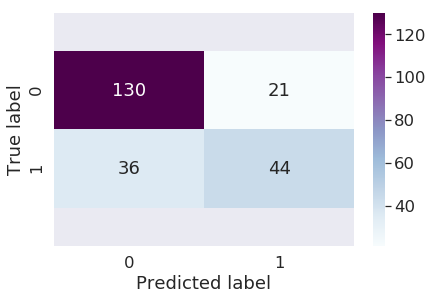

In [167]:
from sklearn.metrics import classification_report, confusion_matrix

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

In [168]:
print (classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       151
           1       0.68      0.55      0.61        80

   micro avg       0.75      0.75      0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231

